# Word2Vec
- 어떤 단어가 목표 단어 근처에 출현할 가능성이 높을까?
    - => 적당한 차원의 벡터로 단어의 의미를 부호화하는 방법 고안
    - 비지도 학습(unsupervised learning)
    - 문장 안에서 대상 단어의 근처 단어들을 예측하게 만드는 것


- 중요한 점
    - 예측을 위해 word2vec이 점진적으로 형성해 나가는 벡터들


- word2vec은 단어에 연관된 성질들도 학습
- 단어 벡터들을 형성(학습)함에 따라 한 단어의 의미가 이웃 단어들로 **번진다**
- 보통 **"같은 문장 안에서 다섯 단어 이내로"**
- 단어 벡터 **연산이 의미가 있다** -> 단어 벡터를 빼고 더하면 원래의 벡터들과는 다른 의미의 단어 벡터가 나옴
- 단어 벡터를 가중치들 또는 점수들이라고 생각하면 이해하기 쉽다. 

# Word2Vec의 단어 표현 계산 

## Skip-gram(스킵그램)
- 다층 신경망
- 주어진 한 단어가 입력이고 그 주변 단어가 출력
- 주어진 입력 단어에 기초해 일정 범위 이내의 주변단어들 예측
- (참고) 스캡그램은 중간에 빈자리가 있는 n-그램. skip은 중간 토큰을 건너뛴다는 의미
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('./data/재보궐선거댓글데이터_최종_유튜브수정_0429.csv')
df

,제목,날짜,작성일,댓글,출처,"지역(서울:1, 부산:2)","정당(1:더불어민주당,2:국민의힘)","정당평가(부정;0, 긍정:1)",후보(기호 순),"후보평가(부정;0, 긍정:1)",제목댓글
0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-12 19:13:00,철수야! 뜸 들이지 말고 애국하는 마음으로 물러서라~~~,조선일보,NaN,NaN,NaN,NaN,NaN,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 철수야! 뜸 들이..."
1,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-09 13:49:00,박영선은 정동영이 얻은 36프로선에 머무를것. 4.7.이후 OOO정권은 몰락의 길 ...,조선일보,1.0,NaN,NaN,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 박영선은 정동영이..."
2,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-07 14:42:00,빵선이가서울시장되면서울은공산국가수도제2의평양이될것이다,조선일보,1.0,NaN,NaN,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 빵선이가서울시장되..."
3,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-07 14:38:00,서울시장후보더듬당박빵선이는절대로서울시장을할수없다이유는가족은미국.영국에 영주권자이므로...,조선일보,1.0,1.0,0.0,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 서울시장후보더듬당..."
4,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-07 14:02:00,부산은오거돈선거이고 오거돈치부선거아닌가 오거돈에 성추해으로 생긴선거가 가독도신공항은...,조선일보,2.0,1.0,0.0,NaN,NaN,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 부산은오거돈선거이..."
...,...,...,...,...,...,...,...,...,...,...,...
144134,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:47:00,국민의힘 찍지 말라고 이 뉴스가 나온거임\n내냔에 국민의힘 찍을라 했드만 망했다 친...,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...
144135,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:41:00,굳이 일본과 해저터널 해야되는 이유가 없은이유\n-일본은고속도로비가 비싸다\n차라니...,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...
144136,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:38:00,도랏구나. 열도는 걍 갈라파고스로 남겨 둬라. 재난 난민 넘어 오면 귀찮다.,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...
144137,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:32:00,이걸 왜 하지? 우리한테 아무런 의미가 없는데,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...


In [5]:
# 데이터 구조 파악하기
df.shape

(144139, 11)

https://wikidocs.net/book/2155

# 1. Word2Vec
- 각 단어 벡터가 단어 간 유사도를 반영
- '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [7]:
df['제목댓글'].shape

(144139,)

In [8]:
df['제목댓글'].isnull().sum()

0

### 1.1 한글 정규 표현식으로 한글 외 문자 제거

In [9]:
def text_clearing(text):
    # 한글 정규식
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    
    # 한글 외의 모든 문자를 길이가 0인 문자열로 변형
    result = hangul.sub('', text)
    
    return result

In [10]:
df['제목댓글'] = df['제목댓글'].apply( lambda x: text_clearing(x))

In [11]:
# 불용어 정의
with open ('../2030표심 및 정치성향 분석/data/불용어/politics_stopwords_nouns.txt', 'rt',encoding='utf-8') as fp:
    stopwords = fp.readlines()
stopwords = [i.replace('\n','') for i in stopwords]


In [13]:
df['제목댓글']

0         재보궐  부산 김영춘  박형준 서울도 양자 대결 철수야 뜸 들이지 말고 애국하는 마...
1         재보궐  부산 김영춘  박형준 서울도 양자 대결 박영선은 정동영이 얻은 프로선에 머...
2         재보궐  부산 김영춘  박형준 서울도 양자 대결 빵선이가서울시장되면서울은공산국가수도...
3         재보궐  부산 김영춘  박형준 서울도 양자 대결 서울시장후보더듬당박빵선이는절대로서울...
4         재보궐  부산 김영춘  박형준 서울도 양자 대결 부산은오거돈선거이고 오거돈치부선거아...
                                ...                        
144134    논설위원의 단도직입한일해저터널 경제성 없지만동북아 경제권 차원서 장기 검토해야 국민...
144135    논설위원의 단도직입한일해저터널 경제성 없지만동북아 경제권 차원서 장기 검토해야 굳이...
144136    논설위원의 단도직입한일해저터널 경제성 없지만동북아 경제권 차원서 장기 검토해야 도랏...
144137    논설위원의 단도직입한일해저터널 경제성 없지만동북아 경제권 차원서 장기 검토해야 이걸...
144138    논설위원의 단도직입한일해저터널 경제성 없지만동북아 경제권 차원서 장기 검토해야 우리...
Name: 제목댓글, Length: 144139, dtype: object

In [12]:
# 형태소 정의
okt = Okt()
tokenized_data = []
for sentence in df['제목댓글']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

제목+댓글내용의 최대 길이 : 1266
제목+댓글내용의 평균 길이 : 35.0215000797841


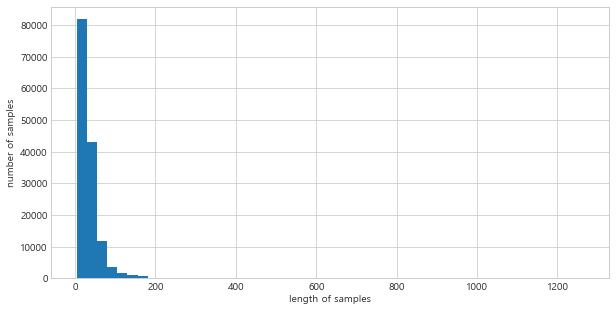

In [19]:
# 제목+댓글내용 길이 분포 확인
print('제목+댓글내용의 최대 길이 :',max(len(l) for l in tokenized_data))
print('제목+댓글내용의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 1.2  Word2Vec 훈련시키기
- (없음)size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [15]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [16]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(21637, 100)

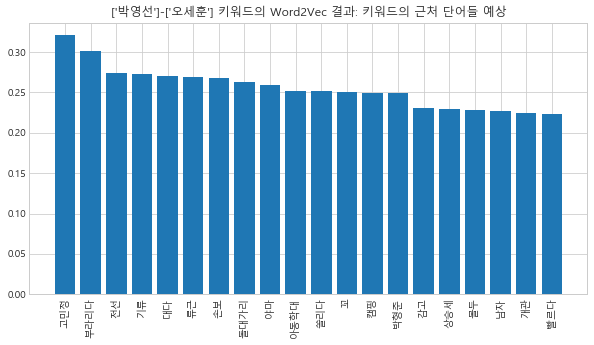

In [18]:
keywords = ['박영선']
negative_words = ['오세훈']
result = np.array(model.wv.most_similar( positive=keywords, negative=negative_words , topn=20))
tmp = [float(i) for i in result[:,1] ]
plt.bar( result[:,0], tmp )
plt.xticks(rotation=90)
plt.title(f'{keywords}-{negative_words} 키워드의 Word2Vec 결과: 키워드의 근처 단어들 예상')
plt.show()

In [23]:
print(model.wv.most_similar("오세훈"))

[('세훈', 0.5848418474197388), ('박영선', 0.5764411687850952), ('초조하다', 0.4346209764480591), ('김영춘', 0.43386954069137573), ('금태섭', 0.4278375506401062), ('유선', 0.4111238718032837), ('내곡동', 0.40984031558036804), ('불꽃', 0.4010070264339447), ('오', 0.3994719684123993), ('유력하다', 0.399166077375412)]


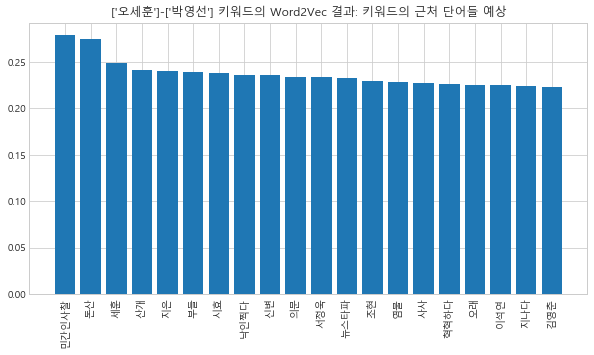

In [19]:
keywords = ['오세훈']
negative_words = ['박영선']
result = np.array(model.wv.most_similar( positive=keywords, negative=negative_words , topn=20))
tmp = [float(i) for i in result[:,1] ]
plt.bar( result[:,0], tmp )
plt.xticks(rotation=90)
plt.title(f'{keywords}-{negative_words} 키워드의 Word2Vec 결과: 키워드의 근처 단어들 예상')
plt.show()

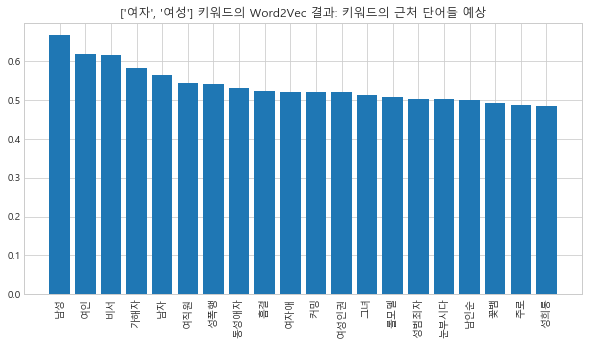

In [20]:
keywords = ['여자','여성']
result = np.array(model.wv.most_similar( positive=keywords , topn=20))
tmp = [float(i) for i in result[:,1] ]
plt.bar( result[:,0], tmp )
plt.xticks(rotation=90)
plt.title(f'{keywords} 키워드의 Word2Vec 결과: 키워드의 근처 단어들 예상')
plt.show()

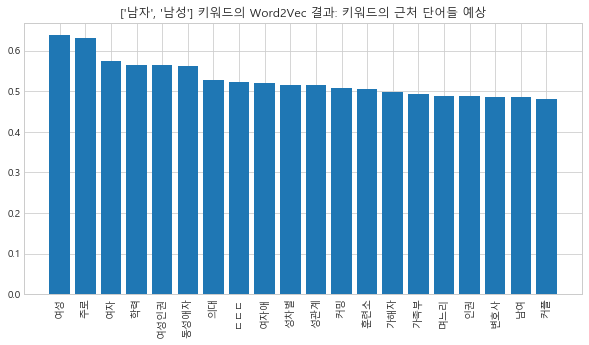

In [21]:
keywords = ['남자','남성']
result = np.array(model.wv.most_similar( positive=keywords , topn=20))
tmp = [float(i) for i in result[:,1] ]
plt.bar( result[:,0], tmp )
plt.xticks(rotation=90)
plt.title(f'{keywords} 키워드의 Word2Vec 결과: 키워드의 근처 단어들 예상')
plt.show()

In [25]:
print(model.wv.most_similar("박형준"))

[('김영춘', 0.5590013265609741), ('자갈치', 0.4380435645580292), ('박영선', 0.4149247407913208), ('환조', 0.3987842798233032), ('엠비', 0.39268428087234497), ('무선전화', 0.3913780450820923), ('엘', 0.38856780529022217), ('은희', 0.38589486479759216), ('정규재', 0.38456737995147705), ('부인', 0.38181737065315247)]


### 1.3 모델 저장

In [26]:
from gensim.models import KeyedVectors
# 모델 저장
model.wv.save_word2vec_format('model/word2vec/w2v_TitleComments_0427')

In [2]:
 # 모델 로드
from gensim.models import KeyedVectors
loaded_model = KeyedVectors.load_word2vec_format("./w2v_TitleComments_0427")

In [3]:
model_result = loaded_model.most_similar("민주당",topn=10)
print(model_result)

[('여당', 0.5833343267440796), ('지당', 0.505938708782196), ('정의당', 0.4959515929222107), ('만지다', 0.4899117350578308), ('민주', 0.47781601548194885), ('당', 0.42012691497802734), ('야당', 0.415071040391922), ('여권', 0.4129944443702698), ('보궐', 0.4082983136177063), ('더듬다', 0.40013939142227173)]


In [4]:
model_result = loaded_model.most_similar("국힘",topn=20)
print(model_result)

[('국짐', 0.8264971971511841), ('더민', 0.7123269438743591), ('구김', 0.6722763180732727), ('불민', 0.6586393713951111), ('국집', 0.6302757859230042), ('당대', 0.6089860200881958), ('더추', 0.5967254638671875), ('힘', 0.5951818823814392), ('더듬이', 0.5773580074310303), ('더블', 0.5682083964347839), ('정청', 0.5678206086158752), ('보수당', 0.5645935535430908), ('짐', 0.5555760860443115), ('덜민', 0.543167769908905), ('국똥', 0.5397177934646606), ('지지자', 0.5289016962051392), ('다수', 0.5119171738624573), ('창', 0.5115551948547363), ('홍준표', 0.49535682797431946), ('신돈', 0.4913056492805481)]


In [5]:
loaded_model.most_similar("오세훈",topn=20)

[('세훈', 0.5848418474197388),
 ('박영선', 0.5764411687850952),
 ('초조하다', 0.4346209764480591),
 ('김영춘', 0.43386954069137573),
 ('금태섭', 0.4278375506401062),
 ('유선', 0.4111238718032837),
 ('내곡동', 0.40984031558036804),
 ('불꽃', 0.4010070264339447),
 ('오', 0.3994719684123993),
 ('유력하다', 0.399166077375412),
 ('우위', 0.39101722836494446),
 ('적합', 0.3858765661716461),
 ('상대', 0.38381409645080566),
 ('김진애', 0.3830387592315674),
 ('토론', 0.3821444511413574),
 ('나경원', 0.36653217673301697),
 ('세후니', 0.36534902453422546),
 ('도사', 0.3632289171218872),
 ('영선', 0.3608013689517975),
 ('대결', 0.35436075925827026)]

### 1.4 단어간 거리 확인
- 코사인 유사도를 이용한 단어간 거리 확인

In [6]:
loaded_model.distance('오세훈', '화이팅')

0.8531581610441208

In [7]:
loaded_model.distance('박영선', '화이팅')

0.7453278601169586

In [8]:
loaded_model.distance('오세훈', '망하다')

1.074504368007183

In [9]:
loaded_model.distance('박영선', '망하다')

1.0924549922347069

# Permission denied:
파일 경로가 이상하거나 파일이 아닌 폴더 경로 등을 지정할 경우 오류가 발생한다. 

출처: https://yjs-program.tistory.com/115 [Y초보프로그래머]